In [109]:
# Introducción

### Describir con lo que trabajamos, enumerar objetivos y su importancia

#! Describir los objetivos (con lo que vamos a trabajar)

#? Ejemplo: (Objetivo principal) Saber predecir si una transacción es fraudulenta o no
#?                               ¿De qué depende que una transaccion sea fraudulenta?
#?                               Si la cantidad sacada es alta, ¿hay mayor probabilidad de que sea fraudulenta?
#?                               ¿A que hora es más probable que haya una transacción fraudulenta?
#? Hasta 5 objetivos


# Datos
##? Describir la fuente de información
##? Variables disponibles
##? Datos recopilados (base de conocimiento)
##! Como se han preparado (limpieza, transformación, creación de variables, etc)
## Dificultades


# Clasificación

## Que modelo es mas apropiado (arbol de decisión, clasificación bayesiana, etc)
## ¿Qué variables son las mas importantes? ¿Por qué? ¿Cómo se puede mejorar el modelo?
## Se tiene que escoger el mas adecuado (hay que probarlos todos)


# Agrupamiento
## Mejor modelo para agrupamiento (basado en prototipos, jerárquico, etc)
### Se tiene que escoger el mas adecuado (hay que probarlos todos)


# Conlusión
## Como se usan nuestros modelos para mejorar la empresa


# Material consultado
## Bibliografía




# Datos de la base de conocimiento

## Variables Time V1-V28 Amount Fraud
## Septiembre de 2013
## 2 dias (Maximo 172792 segundos)


# Preguntas profesor
# Cuando comienza el tiempo. (Si el segundo 0 => 00:00)

In [110]:
credit_df = pd.read_csv('./data/creditcard.csv')

#### Pasamos a quitar las variables más correlacionadas para ahorrar tiempo a la hora de analizar outliers y desbalancear la clase objetivo

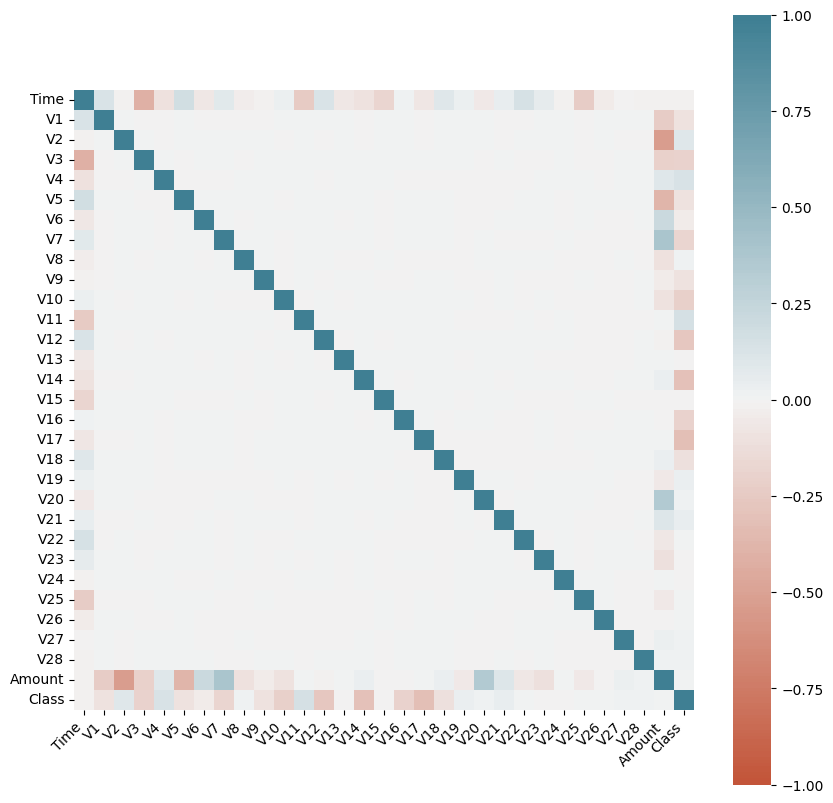

In [111]:
import seaborn as sns

data_corr = credit_df.corr()

plt.figure(figsize=(10,10))
ax = sns.heatmap(
    data_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.savefig('./correlation_matrix.png')

Los resultados indican que no existe correlacción entre los atributos, esto es debido a la transformación PCA

#### Outliers

#### Visualizamos los ouliers usando la formula del IQR

In [112]:
credit_df_test = cc_time_range_df.drop(['Class', 'Hour', 'Amount'], axis=1)

for column in credit_df_test.columns:
    media = np.mean(cc_time_range_df[column])
    desviacion_estandar = np.std(cc_time_range_df[column])
    umbral = 3 * desviacion_estandar
    outliers = cc_time_range_df[abs(cc_time_range_df[column] - media) > umbral]
    if len(outliers) > 0:
        info = f"Columna {column}: {len(outliers)} outliers" + "\n"
        with open("./outliers/outliers_3desviacion_estandar.txt", "a") as file:
            file.write(info)
        cc_time_range_df.drop(outliers.index, inplace=True)
        # print(f"Columna {column}: {len(outliers)} outliers")
        # print(f"Media: {media}")
        # print(f"Desviación estándar: {desviacion_estandar}")
        # print(f"Umbral para outliers: {umbral}")
        # print(f"Filas con  outliers:\n{outliers[column]}")

In [107]:
import numpy as np

credit_df_test = cc_time_range_df.drop(['Class', 'Hour', 'Amount'], axis=1)

for column in credit_df_test.columns:
    Q1 = cc_time_range_df[column].quantile(0.25)
    Q3 = cc_time_range_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = cc_time_range_df[(cc_time_range_df[column] < Q1 - 3*IQR) | (cc_time_range_df[column] > Q3 + 3*IQR)]
    if len(outliers) > 0:
        txt_to_file = "--------------------------------------------------" + "\n"
        txt_to_file += f"Columna: {column}" + "\n"
        txt_to_file += f"Outliers: {len(outliers)}" + "\n"
        with open("./outliers/outliers_IQR.txt", "a") as file:
            file.write(txt_to_file)
        cc_time_range_df.drop(outliers.index, inplace=True)

In [93]:
from matplotlib import pyplot as plt

# drop column Class and Time
credit_df_test = cc_time_range_df.drop(['Class', 'Hour', 'Amount'], axis=1)

for columna in credit_df_test:
    plt.boxplot(cc_time_range_df[columna])
    plt.title(columna)
    plt.savefig(f'./outliers/plots/boxplot_{columna}.png')
    plt.clf()

<Figure size 640x480 with 0 Axes>

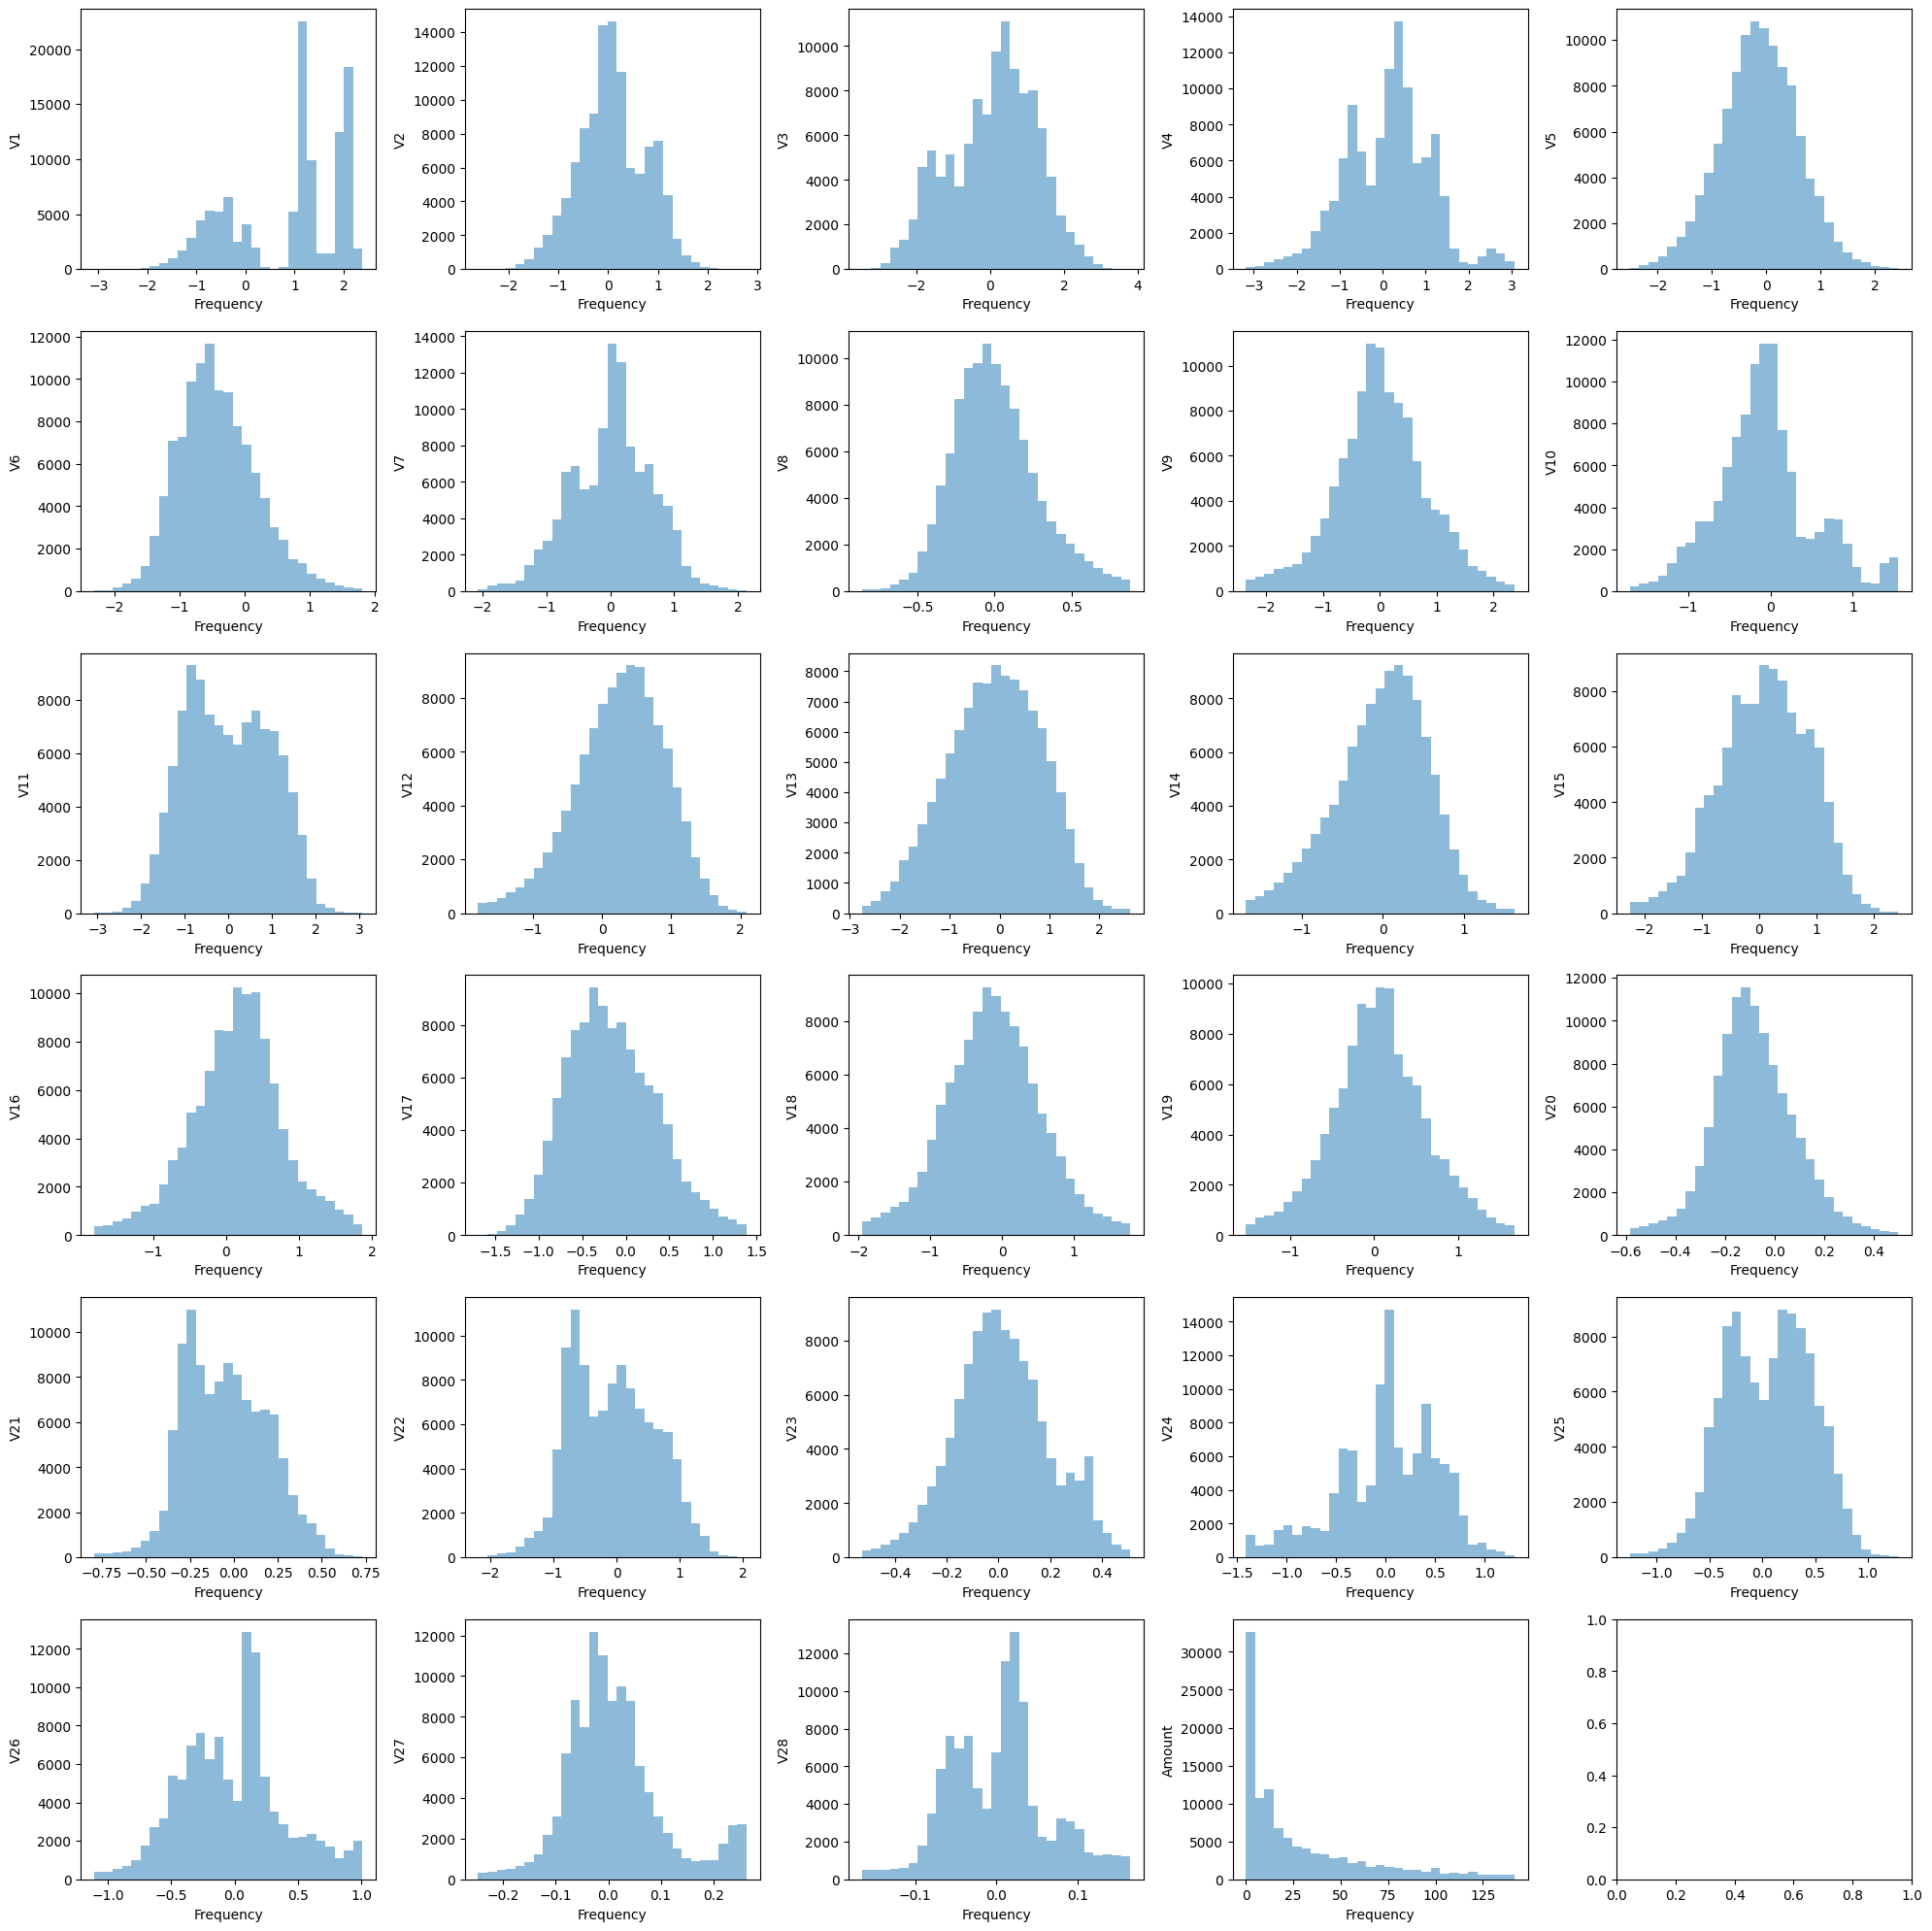

In [74]:
fig, axs = plt.subplots(6, 5, figsize=(20, 20))
axs = axs.flatten()
for i, col in enumerate(credit_df_test.columns):
    axs[i].hist(credit_df_test[col], bins=29, orientation='vertical', alpha=0.5)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Frequency')
plt.tight_layout()
plt.savefig('./outliers/freq_histogram.png')

#### Pasamos a eliminar los outliers que pasen un umbral arbitrario para cada atributo

In [72]:
print(cc_time_range_df[cc_time_range_df['V1'] <= -40]['V1'])
print(cc_time_range_df[cc_time_range_df['V2'] <= -40]['V2'])
print(cc_time_range_df[cc_time_range_df['V2'] >= 20]['V2'])
# df.drop(df[df['Annual Income'] >= 130].index, inplace=True)

39769    -56.407510
206255   -40.042537
220212   -46.855047
224569   -41.928738
234519   -40.470142
Name: V1, dtype: float64
15364    -40.978852
39769    -72.715728
46841    -42.172688
58465    -63.344698
131140   -44.639245
145022   -40.938048
151296   -60.464618
220212   -45.607973
224569   -40.803981
228723   -50.383269
229036   -48.060856
236429   -47.429676
Name: V2, dtype: float64
154587    21.467203
154684    22.057729
Name: V2, dtype: float64


#### Analizamos si la clase objetivo está desbalanceado mirando los valores totales que toman la columna de Class

#### Clase muy desbalanceada

In [ ]:
print(credit_df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [36]:
FEATURES = credit_df.drop(['Class'], axis=1) # Features
TARGET = credit_df['Class']                  # Target

In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42) # Crea un objeto SMOTE con semilla 42
X_sm, y_sm = smote.fit_resample(FEATURES, TARGET)

In [38]:
cc_resampled = pd.concat([pd.DataFrame(X_sm), pd.DataFrame(y_sm)], axis=1)

In [39]:
print('Valores de la columna Class:')
cc_resampled['Class'].describe()

Valores de la columna Class:


count    568630.0
mean          0.5
std           0.5
min           0.0
25%           0.0
50%           0.5
75%           1.0
max           1.0
Name: Class, dtype: float64

#### Transform time attribute

In [40]:
import math

def convert_to_hours(time_diff):
    """
    Rounds the given time differences (in seconds) to the nearest whole number of hours.
    """
    
    if time_diff > 43200:
        time_diff = time_diff / 2
        
    return int(math.floor(time_diff / 3600))

cc_time_range_df = credit_df.copy()

cc_time_range_df['Hour'] = cc_resampled['Time'].apply(convert_to_hours)

last_column = cc_time_range_df.pop('Hour')
cc_time_range_df.drop(['Time'], axis = 1, inplace = True)
cc_time_range_df.insert(0, 'Hour', last_column)

In [24]:
credit_df_resampled = credit_df_resampled.drop(['V1', 'V7', 'V10', 'V11', 'V14', 'V16', 'V18'], axis = 1)
credit_df_resampled.to_csv('./data/datos_credit_balanced_sin_correlacion.csv', index=False)